<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Other_resolution/Image_Save_better_resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
import cv2
from skimage.transform import resize
import zipfile
from google.colab import files
#import random
from random import randint
from skimage import filters
from PIL import Image
import re
import skimage
import pandas as pd
import sklearn
from scipy import ndimage as ndi
from skimage import feature
from skimage import measure
from google.colab import files

In [2]:
!pip install mahotas

In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [4]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/MarquesGabi_Routines


In [5]:
img_name=[]
xw=[]
ww=[]
Transfere = 'Fotos9Amostras_e_variosgraos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [6]:
'''

Size = 28

ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")
'''

'\n\nSize = 28\n\nww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)\nplt.axis("off")\nplt.imshow(ww[10], cmap = "gray")\n'

In [7]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)

In [8]:
img = images[1]

In [9]:
img_resized = resize(img, (1000, 1000))

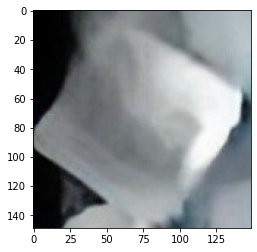

In [10]:
plt.imshow(img)

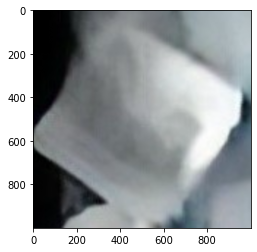

In [11]:
plt.imshow(img_resized)

In [12]:
letter_G = set('G')
letter_V = set('V')
letter_I = set('I')
letter_B = set('B')
Type = []
cont = 0
for word in labels:
    if letter_G & set(word):
        Type.append('G')
    if letter_V & set(word):
        Type.append('V')
    if letter_I & set(word):
        Type.append('I')
    if letter_B & set(word):
        Type.append('B')
print(Type)  

['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'V', 'V', 'V', 'V', 'V', 'V', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'V', 'V', 'V', 'V', 'V', 'V', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'V', 'V', 'V', 'V', 'V', 'V', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'V', 'V', 'V', 'V', 'V', 'V', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'V', 'V', 'V', 'V', 'V', 'V', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'V', 'V', 'V', 'V', 'V', 'V', 'B', 'B', 'B', 'B',

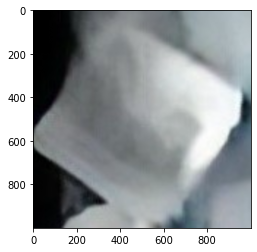

In [13]:
plt.imshow(img_resized)

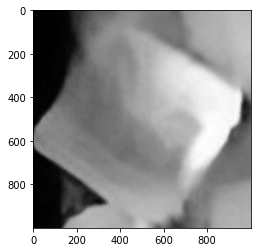

In [14]:
img_gray = color.rgb2gray(img_resized)
plt.imshow(img_gray,cmap='gray')

In [15]:
img_gray.shape

(1000, 1000)

In [16]:
Num = len(images)
ww = []
Size =100

for i in range(1,Num):
  img = images[i]
  img_resized = resize(img, (Size, Size))
  img_gray = color.rgb2gray(img_resized)
  ww.append(img_gray.ravel())


df = pd.DataFrame(ww)
df['Type'] = Type

In [17]:
img_resized.ravel()

array([0.29048471, 0.43359373, 0.60028863, ..., 0.09929412, 0.22478431,
       0.36865255])

In [18]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Type
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001999,0.004410,0.007512,0.007597,0.001814,0.018416,0.006493,0.018636,0.025866,0.036456,0.089498,0.132715,0.182406,0.195022,0.192709,0.217273,0.248402,0.271295,0.301761,0.327257,0.349679,0.368218,0.379251,0.386623,0.392048,0.397745,0.401103,0.401025,0.404894,0.416580,0.434169,0.460933,0.493110,...,0.389206,0.344270,0.293615,0.240478,0.220916,0.214827,0.230029,0.267516,0.303217,0.344269,0.368436,0.382597,0.407156,0.435826,0.475790,0.487651,0.479620,0.450575,0.439354,0.486182,0.543086,0.604724,0.637116,0.652283,0.658162,0.676809,0.679400,0.686197,0.687435,0.688788,0.691357,0.693293,0.694552,0.690781,0.686060,0.684924,0.690648,0.692724,0.695607,G
1,0.590733,0.590733,0.593513,0.600688,0.602888,0.603884,0.606493,0.607812,0.607865,0.610737,0.606924,0.615330,0.633028,0.659495,0.684460,0.699325,0.714745,0.724019,0.712735,0.718909,0.739403,0.742262,0.748695,0.758599,0.767703,0.794826,0.832993,0.870705,0.914748,0.955046,0.984443,0.981314,0.982499,0.984577,0.983864,0.986575,0.986569,0.981710,0.982986,0.983163,...,0.515158,0.521394,0.523707,0.525853,0.531329,0.532653,0.525593,0.519400,0.517106,0.522404,0.529931,0.527789,0.525735,0.515755,0.507206,0.503637,0.504476,0.505665,0.507559,0.506294,0.502238,0.504885,0.506160,0.506160,0.502238,0.502238,0.502238,0.501082,0.498856,0.494157,0.492460,0.497766,0.506807,0.512615,0.517496,0.535938,0.548059,0.551222,0.550831,G
2,0.782922,0.567252,0.436217,0.422201,0.383646,0.408192,0.458177,0.534249,0.586286,0.623401,0.649196,0.649104,0.654247,0.653861,0.655389,0.679137,0.691348,0.701388,0.722229,0.741845,0.748453,0.754893,0.775516,0.785541,0.789540,0.788691,0.781585,0.778936,0.777410,0.770414,0.738796,0.701680,0.639025,0.620904,0.615012,0.628039,0.618398,0.613603,0.608772,0.594399,...,0.619088,0.623804,0.626015,0.633530,0.638861,0.639104,0.635193,0.638450,0.638591,0.633140,0.627689,0.623316,0.625924,0.631474,0.641321,0.654669,0.665172,0.668211,0.668976,0.669088,0.669913,0.669249,0.669204,0.669204,0.670202,0.671024,0.676214,0.686301,0.692875,0.691104,0.683588,0.690719,0.696150,0.688000,0.686973,0.684969,0.695368,0.688670,0.690964,G


In [19]:
# save here before crop Type column
Arq = "output.xlsx"
df.to_excel(Arq)
#Arq = "output.csv"
#df.to_csv(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# crop type column
del df['Type']

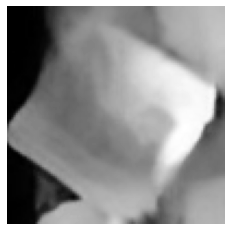

In [21]:

data=(255*np.array(df.iloc[0,:])).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.axis('off')
plt.imshow(Foto, cmap = "gray")
